In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_excel('weather.xls', skiprows=6)
data = data[data['T'].isna() == False]

In [3]:
data = data.rename(columns={'Местное время в Санкт-Петербурге':'Date'})

In [4]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['dayofyear'] = data['Date'].dt.dayofyear
date = '2019-01-01'

In [5]:
def regression(data, date, *features, regressor=LinearRegression()):
    df_train = data[data['Date'] < date]
    df_test = data[data['Date'] >= date]
    
    X_train = pd.DataFrame()
    X_test = pd.DataFrame()
    for feature in features:
        X_train[feature] = df_train[feature]
        X_test[feature] = df_test[feature]
    
    Y_train = df_train['T']
    Y_test = df_test['T']
    
    model = regressor
    model.fit(X_train, Y_train)
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    sns.scatterplot(x=data['dayofyear'], y=data['T'], s=1)
    sns.scatterplot(x=df_test['dayofyear'], y=pred_test, s=20)
    sns.scatterplot(x=df_train['dayofyear'], y=pred_train, s=20)
    
    error_train = mean_squared_error(df_train['T'], pred_train)
    error_test = mean_squared_error(df_test['T'], pred_test)
    
    print(f'Ошибка на тренировочной выборке равна {error_train}')
    print(f'Ошибка на тестовой выборке равна {error_test}')

#1 Косинус дня в году

Ошибка на тренировочной выборке равна 26.176167049423594
Ошибка на тестовой выборке равна 28.91910959154531


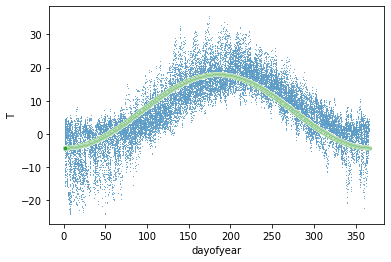

In [6]:
feature = 'cos_of_dayofyear'
data['cos_of_dayofyear'] = np.cos((data['dayofyear']-1)/366 * 2 * np.pi)

regression(data, date, feature)

#2 Косинус+синус дня в году

Ошибка на тренировочной выборке равна 21.304732982730236
Ошибка на тестовой выборке равна 24.40151497976726


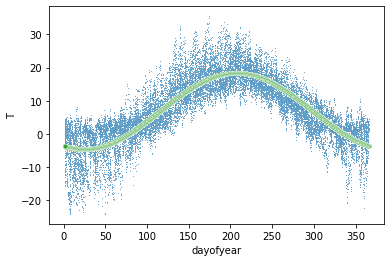

In [7]:
feature = 'sin_cos_of_dayofyear'
data['sin_cos_of_dayofyear'] = (np.cos((data['dayofyear']-1)/366 * 2 * np.pi) +
                                np.sin((data['dayofyear']-1)/366 * 2 * np.pi + np.pi/4))

regression(data, date, feature)

#3 Косинус+синус дня в году и время дня

Ошибка на тренировочной выборке равна 20.4269427210664
Ошибка на тестовой выборке равна 23.490274786839773


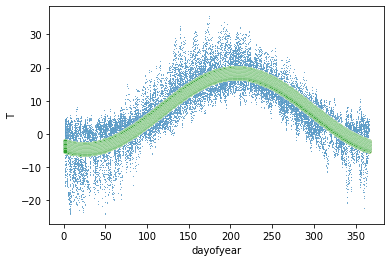

In [8]:
feature = ['sin_cos_of_dayofyear', 'hourofday']

data['sin_cos_of_dayofyear'] = (np.cos((data['dayofyear']-1)/366 * 2 * np.pi) +
                                np.sin((data['dayofyear']-1)/366 * 2 * np.pi + np.pi/4))
data['hourofday'] = data['Date'].dt.hour

regression(data, date, feature)

#4 Косинус+синус дня в году и синус времени дня

Ошибка на тренировочной выборке равна 19.722968058153498
Ошибка на тестовой выборке равна 22.734844609606142


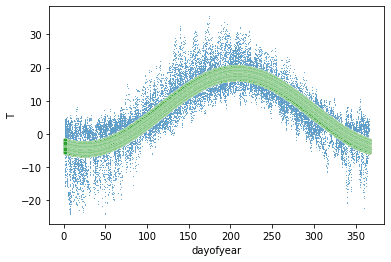

In [9]:
feature = ['sin_cos_of_dayofyear', 'sin_hourofday']

data['sin_cos_of_dayofyear'] = (np.cos((data['dayofyear']-1)/366 * 2 * np.pi) +
                                np.sin((data['dayofyear']-1)/366 * 2 * np.pi + np.pi/4))
data['sin_hourofday'] = np.sin(data['Date'].dt.hour / 24 * 2 * np.pi + np.pi/6)

regression(data, date, feature)

#5 Косинус+синус дня в году и синус времени дня и год

Ошибка на тренировочной выборке равна 19.63897588510205
Ошибка на тестовой выборке равна 23.915363181266596


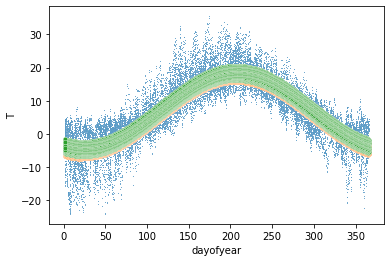

In [11]:
feature = ['sin_cos_of_dayofyear', 'sin_hourofday', 'year']

data['sin_cos_of_dayofyear'] = (np.cos((data['dayofyear']-1)/366 * 2 * np.pi) +
                                np.sin((data['dayofyear']-1)/366 * 2 * np.pi + np.pi/4))
data['sin_hourofday'] = np.sin(data['Date'].dt.hour / 24 * 2 * np.pi + np.pi/6)
data['year'] = data['Date'].dt.year

regression(data, date, feature)

#6 Косинус+синус дня в году и синус времени дня + DecisionTreeRegressor

Ошибка на тренировочной выборке равна 18.247287952898052
Ошибка на тестовой выборке равна 24.226931283948993


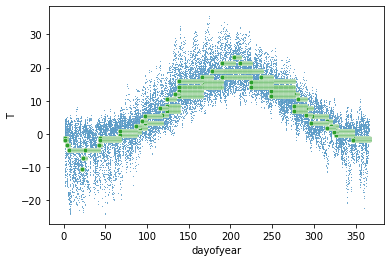

In [12]:
feature = ['sin_cos_of_dayofyear', 'sin_hourofday']

data['sin_cos_of_dayofyear'] = (np.cos((data['dayofyear']-1)/366 * 2 * np.pi) +
                                np.sin((data['dayofyear']-1)/366 * 2 * np.pi + np.pi/4))
data['sin_hourofday'] = np.sin(data['Date'].dt.hour / 24 * 2 * np.pi + np.pi/6)

regression(data, date, feature, regressor=DecisionTreeRegressor(max_depth=5))